In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/' 

In [3]:
model_glob = tf.keras.models.load_model(data_path+'w6_pfn_bigtest.hdf5')
model_noglob = tf.keras.models.load_model(data_path+'w6_pfn_noglob.hdf5')

In [4]:
file = np.load(data_path+'nn_splitdata_kd.npz')

In [5]:
X_train = file['arr_0']
X_val = file['arr_1']
X_test = file['arr_2']
Y_train = file['arr_3']
Y_val = file['arr_4']
Y_test = file['arr_5']
X_glob_tr = file['arr_6']
X_glob_val = file['arr_7']
X_glob_te = file['arr_8']
eta_train = file['arr_9']
eta_val = file['arr_10']
eta_test = file['arr_11']

In [9]:
#define the different eta regions
selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

selections = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]


In [35]:
#this cell for the global model

#concatenate the Xs:
X_tr = [X_train, X_glob_tr]
X_vali = [X_val, X_glob_val]
X_te = [X_test, X_glob_te]

#make metrics
X_1, X_2 = X_te
fps_g = []
tps_g = []
aucs_g = []
for selection in selections:
    X_interm = [X_1[selection], X_2[selection]]
    preds_g = model_glob.predict(X_interm, batch_size=1000) 
    pfn_fp_g, pfn_tp_g, threshs_g = roc_curve(Y_test[selection][:,1], preds_g[:,1])

    fps_g.append(pfn_fp_g)
    tps_g.append(pfn_tp_g)
    
    # get area under the ROC curve
    auc_g = roc_auc_score(Y_test[selection][:,1], preds_g[:,1])
    aucs_g.append(auc_g)
    print('PFN AUC:', auc_g)


PFN AUC: 0.9769966576517106
PFN AUC: 0.9809492042355129
PFN AUC: 0.9787195423421552
PFN AUC: 0.9792529571946277
PFN AUC: 0.9794923177656689
PFN AUC: 0.9752101661625746
PFN AUC: 0.9808757475818956
PFN AUC: 0.9792151774577835
PFN AUC: 0.9761637467877036
PFN AUC: 0.976116746860723
PFN AUC: 0.9766680145773307
PFN AUC: 0.97456081958388
PFN AUC: 0.9716432428387934
PFN AUC: 0.9598111217721336
PFN AUC: 0.925283328843032
PFN AUC: 0.929897214773886
PFN AUC: 0.9498913337120263
PFN AUC: 0.9390970064215101
PFN AUC: 0.9368885741576615
PFN AUC: 0.9382833503417136
PFN AUC: 0.9476007951628287
PFN AUC: 0.9532356502154383
PFN AUC: 0.9566363400190422
PFN AUC: 0.9571297402401989
PFN AUC: 0.9573063223460095
PFN AUC: 0.970991996440706
PFN AUC: 0.9875181386761792
PFN AUC: 0.9829509002891935
PFN AUC: 0.9882102252171858
PFN AUC: 0.9909341717051477
PFN AUC: 0.965855233820675


In [36]:
#this cell for the no global model

#make metrics
fps_ng = []
tps_ng = []
aucs_ng = []
for selection in selections:
    preds = model_noglob.predict(X_test[selection], batch_size=1000) 
    pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])

    fps_ng.append(pfn_fp)
    tps_ng.append(pfn_tp)
    
    # get area under the ROC curve
    auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
    aucs_ng.append(auc)
    print('PFN AUC:', auc)


PFN AUC: 0.9742724696259174
PFN AUC: 0.9791890672275534
PFN AUC: 0.9756983052301497
PFN AUC: 0.9763583011417314
PFN AUC: 0.9784398383948203
PFN AUC: 0.9741486927288655
PFN AUC: 0.9791332357067264
PFN AUC: 0.9777356265714786
PFN AUC: 0.9755517300593612
PFN AUC: 0.9746097164010394
PFN AUC: 0.9755062871825633
PFN AUC: 0.9740329493162057
PFN AUC: 0.9698857456204161
PFN AUC: 0.9568244558475708
PFN AUC: 0.9135312695604807
PFN AUC: 0.9243419912437513
PFN AUC: 0.9429067835651308
PFN AUC: 0.9345538726970313
PFN AUC: 0.9318715732197224
PFN AUC: 0.9332849736504232
PFN AUC: 0.9427776626922365
PFN AUC: 0.9499530448165208
PFN AUC: 0.9538779950777179
PFN AUC: 0.9526393506129673
PFN AUC: 0.9486024239171996
PFN AUC: 0.9566803574074634
PFN AUC: 0.983137291866082
PFN AUC: 0.9813206346914745
PFN AUC: 0.9842577094317233
PFN AUC: 0.9874682925998826
PFN AUC: 0.9620295898549636


In [37]:
eta_ranges = np.arange(0., 3.1, .1)+.05

In [38]:
eta_ranges[:-1]

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

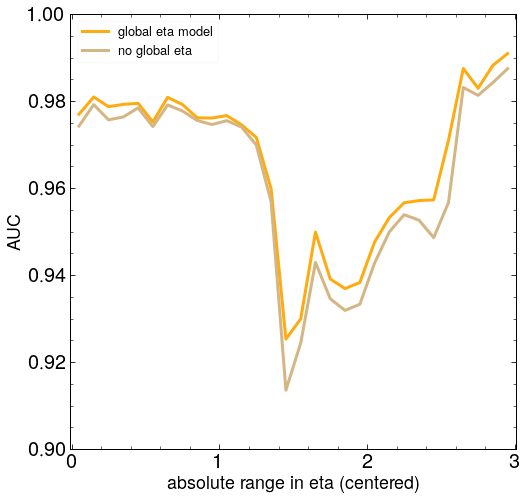

In [39]:
plt.figure(figsize=[8,8])
plt.xlim(-.01, 3.01)
plt.plot(eta_ranges[:-1], aucs_g[:-1], linewidth=3, c='xkcd:yellowish orange', label='global eta model')
plt.plot(eta_ranges[:-1], aucs_ng[:-1], linewidth=3, c='xkcd:very light brown', label='no global eta')
plt.xlabel('absolute range in eta (centered)')
plt.ylabel('AUC')
plt.legend()

In [40]:
from scipy.interpolate import interp1d

In [41]:
fg = []
for i in range(len(fps_g)):
    fg.append(interp1d(tps_g[i], 1/fps_g[i]))

fng = []
for i in range(len(fps_ng)):
    fng.append(interp1d(tps_ng[i], 1/fps_ng[i]))


<ipython-input-41-afe77e200d3e>:3: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps_g[i], 1/fps_g[i]))
<ipython-input-41-afe77e200d3e>:7: RuntimeWarning: divide by zero encountered in true_divide
  fng.append(interp1d(tps_ng[i], 1/fps_ng[i]))


In [42]:
reg95_g = []
for i in range(len(fg)):
    reg95_g.append(fg[i](.95))
    
reg95_ng = []
for i in range(len(fng)):
    reg95_ng.append(fng[i](.95))

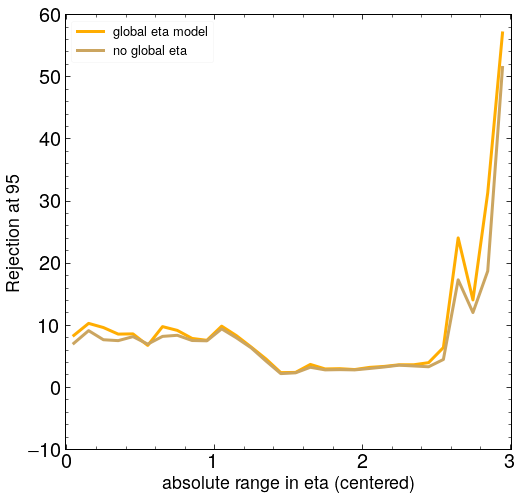

In [43]:
plt.figure(figsize=[8,8])
plt.xlim(-.01, 3.01)
plt.plot(eta_ranges[:-1], reg95_g[:-1], linewidth=3, c='xkcd:orange yellow', label='global eta model')
plt.plot(eta_ranges[:-1], reg95_ng[:-1], linewidth=3, c='xkcd:sand brown', label='no global eta')
plt.xlabel('absolute range in eta (centered)')
plt.ylabel('Rejection at 95% efficiency')
plt.legend()

In [21]:
labs1 = ['$\eta$ < .1', '.1 <= $\eta$ < .2', '.2 <= $\eta$ < .3','.3 <= $\eta$ < .4','.4 <= $\eta$ < .5']
labs2 = ['.5 <= $\eta$ < .6','.6 <= $\eta$ < .7','.7 <= $\eta$ < .8','.8 <= $\eta$ < .9','.9 <= $\eta$ < 1.']
labs3 = ['1. <= $\eta$ < 1.1','1.1 <= $\eta$ < 1.2','1.2 <= $\eta$ < 1.3','1.3 <= $\eta$ < 1.4','1.4 <= $\eta$ < 1.5']
labs4 = ['1.5 <= $\eta$ < 1.6','1.6 <= $\eta$ < 1.7','1.7 <= $\eta$ < 1.8','1.8 <= $\eta$ < 1.9','1.9 <= $\eta$ < 2']
labs5 = ['2. <= $\eta$ < 2.1','2.1 <= $\eta$ < 2.2','2.2 <= $\eta$ < 2.3','2.3 <= $\eta$ < 2.4','2.4 <= $\eta$ < 2.5']
labs6 = ['2.5 <= $\eta$ < 2.6','2.6 <= $\eta$ < 2.7','2.7 <= $\eta$ < 2.8','2.8 <= $\eta$ < 2.9','2.9 <= $\eta$ < 3.']
        

def plots(ax, labs, fps, tps, aucs, title, col):
    ax.set_title('range = '+title)
    ax.set_xlim(0.,.2)
    ax.set_ylim(.8,1.)
    ax.plot([0, 1], [0, 1], 'k--')
    for i in range(len(labs)):
        ax.plot(fps[i], tps[i], c=col[i], linewidth=3, label=labs[i] + ' AUC = %.3f '%aucs[i])
    ax.plot(fps_ng[-1], tps_ng[-1], c='b', label='all eta'+' AUC = %.3f '%aucs_ng[-1] )
    ax.set_ylabel('True positive rate')
    ax.set_xlabel('False positive rate')
    ax.legend() 

In [19]:
len(fps_g[5:10])

5

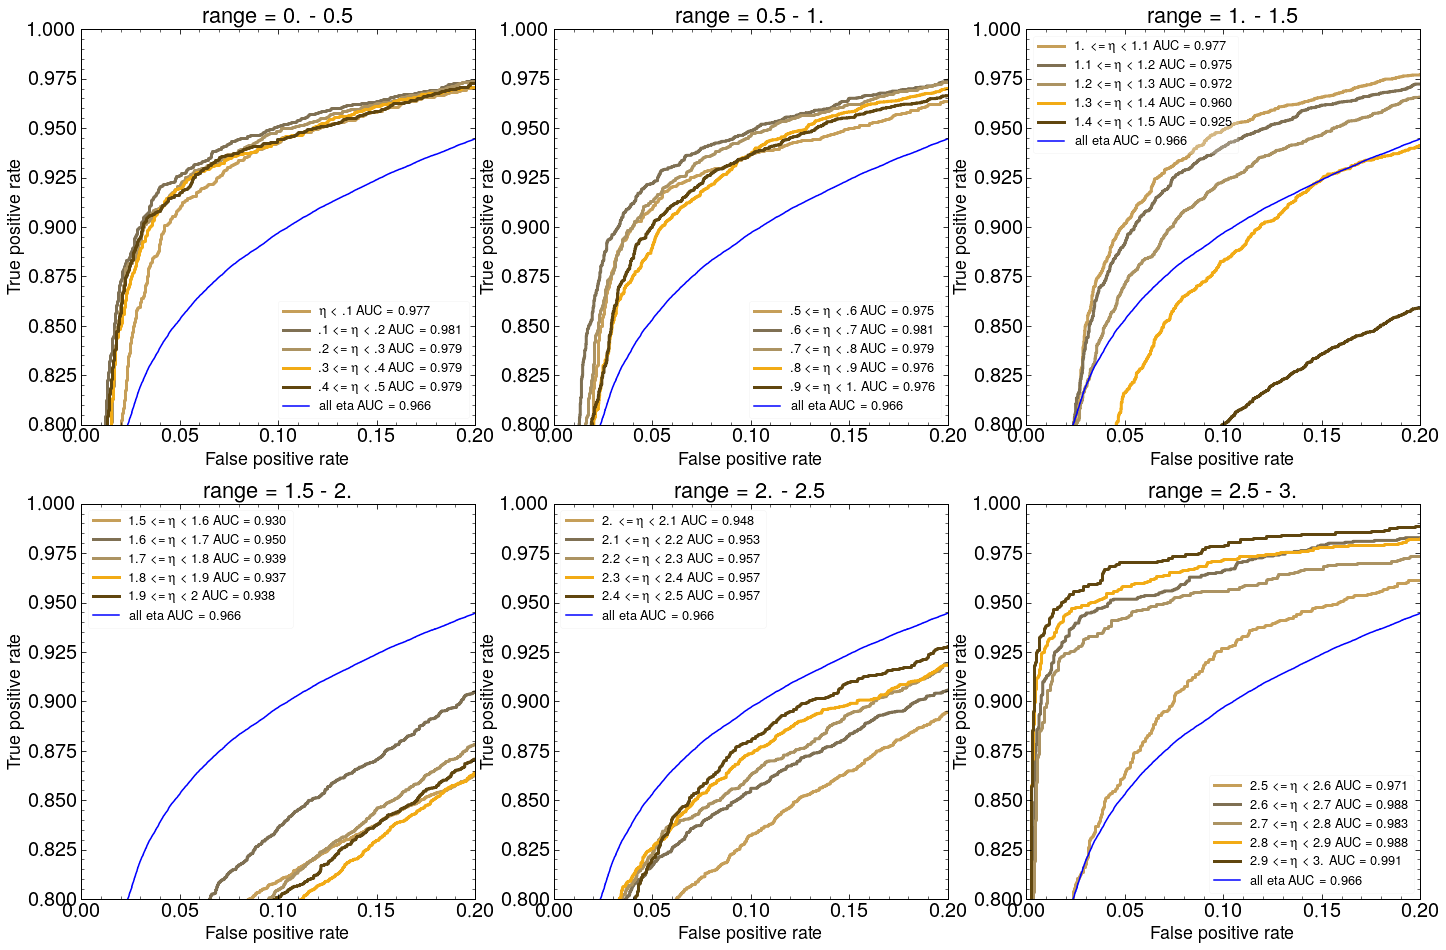

In [20]:
col = ['xkcd:camel', 'xkcd:grey brown', 'xkcd:dark beige', 'xkcd:squash', 'xkcd:mud brown']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=[24,16])

plots(ax1, labs1, fps_g[:5], tps_g[:5], aucs_g[:5], '0. - 0.5', col)
plots(ax2, labs2, fps_g[5:10], tps_g[5:10], aucs_g[5:10], '0.5 - 1.', col)
plots(ax3, labs3, fps_g[10:15], tps_g[10:15], aucs_g[10:15], '1. - 1.5', col)
plots(ax4, labs4, fps_g[15:20], tps_g[15:20], aucs_g[15:20], '1.5 - 2.', col)
plots(ax5, labs5, fps_g[20:25], tps_g[20:25], aucs_g[20:25], '2. - 2.5', col)
plots(ax6, labs6, fps_g[25:30], tps_g[25:30], aucs_g[25:30], '2.5 - 3.', col)
plt.savefig('./eta_ranges_AUCs')

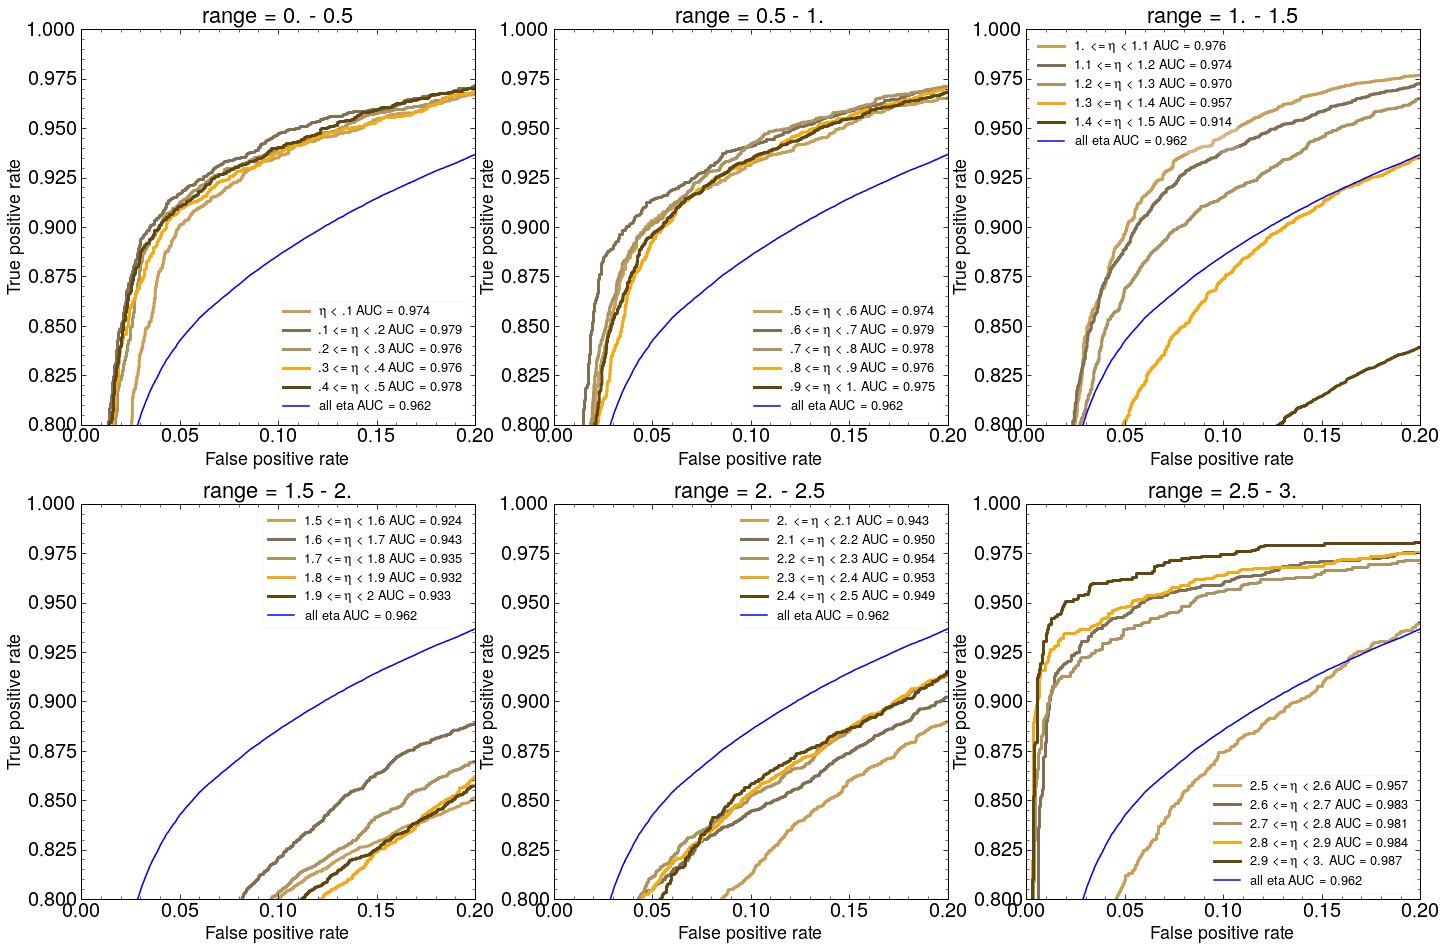

In [22]:
col = ['xkcd:camel', 'xkcd:grey brown', 'xkcd:dark beige', 'xkcd:squash', 'xkcd:mud brown']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=[24,16])

plots(ax1, labs1, fps_ng[:5], tps_ng[:5], aucs_ng[:5], '0. - 0.5', col)
plots(ax2, labs2, fps_ng[5:10], tps_ng[5:10], aucs_ng[5:10], '0.5 - 1.', col)
plots(ax3, labs3, fps_ng[10:15], tps_ng[10:15], aucs_ng[10:15], '1. - 1.5', col)
plots(ax4, labs4, fps_ng[15:20], tps_ng[15:20], aucs_ng[15:20], '1.5 - 2.', col)
plots(ax5, labs5, fps_ng[20:25], tps_ng[20:25], aucs_ng[20:25], '2. - 2.5', col)
plots(ax6, labs6, fps_ng[25:30], tps_ng[25:30], aucs_ng[25:30], '2.5 - 3.', col)
plt.savefig('./eta_ranges_AUCs_noglob')

In [7]:
#lets do ranges like the ones in that figure:

#define the different eta regions
selec_l02 = abs(eta_test) < 0.2
selec_b0207 = (abs(eta_test) >= .2) & (abs(eta_test) < .7)
selec_b0713 = (abs(eta_test) >= .7) & (abs(eta_test) < 1.3)
selec_b1317 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.8)
selec_b1825 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 2.5)
selec_b2531 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 4.)
selec_all = abs(eta_test) <= 4. 

In [23]:
selections2 = [selec_l02, selec_b0207, selec_b0713, selec_b1317, selec_b1825, selec_b2531, selec_all]


In [44]:
#this cell for the global model

#concatenate the Xs:
X_tr = [X_train, X_glob_tr]
X_vali = [X_val, X_glob_val]
X_te = [X_test, X_glob_te]

#make metrics
X_1, X_2 = X_te
fps_g2 = []
tps_g2 = []
aucs_g2 = []
for selection in selections2:
    X_interm = [X_1[selection], X_2[selection]]
    preds_g2 = model_glob.predict(X_interm, batch_size=1000) 
    pfn_fp_g2, pfn_tp_g2, threshs_g2 = roc_curve(Y_test[selection][:,1], preds_g2[:,1])

    fps_g2.append(pfn_fp_g2)
    tps_g2.append(pfn_tp_g2)
    
    # get area under the ROC curve
    auc_g2 = roc_auc_score(Y_test[selection][:,1], preds_g2[:,1])
    aucs_g2.append(auc_g2)
    print('PFN AUC:', auc_g2)


PFN AUC: 0.9789964945768687
PFN AUC: 0.9787578341398765
PFN AUC: 0.9759902639232718
PFN AUC: 0.9401797789662293
PFN AUC: 0.9495635769557131
PFN AUC: 0.9837622810941292
PFN AUC: 0.965855233820675


In [45]:
#this cell for the no global model

#make metrics
fps_ng2 = []
tps_ng2 = []
aucs_ng2 = []
for selection in selections2:
    preds2 = model_noglob.predict(X_test[selection], batch_size=1000) 
    pfn_fp2, pfn_tp2, threshs2 = roc_curve(Y_test[selection][:,1], preds2[:,1])

    fps_ng2.append(pfn_fp2)
    tps_ng2.append(pfn_tp2)
    
    # get area under the ROC curve
    auc2 = roc_auc_score(Y_test[selection][:,1], preds2[:,1])
    aucs_ng2.append(auc2)
    print('PFN AUC:', auc2)


PFN AUC: 0.9767496719672099
PFN AUC: 0.9767825251507279
PFN AUC: 0.9748055352143333
PFN AUC: 0.9330585232449278
PFN AUC: 0.9445955682353582
PFN AUC: 0.978176492586307
PFN AUC: 0.9620295898549636


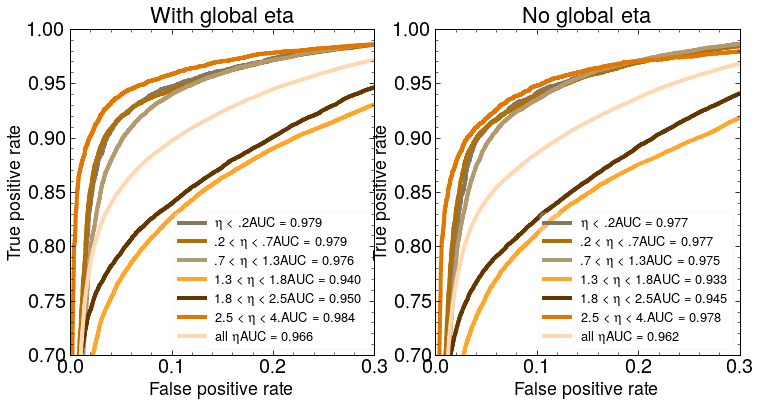

In [46]:
labs = ['$\eta$ < .2', '.2 < $\eta$ < .7', '.7 < $\eta$ < 1.3', '1.3 < $\eta$ < 1.8','1.8 < $\eta$ < 2.5', '2.5 < $\eta$ < 4.', 'all $\eta$']
 
fig2, (ax3, ax4) = plt.subplots(1,2, figsize=[12,6])

ax3.set_title('With global eta')
ax3.set_xlim(0.,.3)
ax3.set_ylim(.7,1.)
ax3.plot([0, 1], [0, 1], 'k--')
ax3.plot(fps_g2[0], tps_g2[0], c='xkcd:brownish grey', linewidth=4, label=labs[0] + 'AUC = %.3f '%aucs_g2[0])
ax3.plot(fps_g2[1], tps_g2[1], c='xkcd:caramel', linewidth=4, label=labs[1] + 'AUC = %.3f '%aucs_g2[1])
ax3.plot(fps_g2[2], tps_g2[2], c='xkcd:dust', linewidth=4, label=labs[2] + 'AUC = %.3f '%aucs_g2[2])
ax3.plot(fps_g2[3], tps_g2[3], c='xkcd:mango', linewidth=4, label=labs[3] + 'AUC = %.3f '%aucs_g2[3])
ax3.plot(fps_g2[4], tps_g2[4], c='xkcd:brown', linewidth=4, label=labs[4] + 'AUC = %.3f '%aucs_g2[4])
ax3.plot(fps_g2[5], tps_g2[5], c='xkcd:pumpkin', linewidth=4, label=labs[5] + 'AUC = %.3f '%aucs_g2[5])
ax3.plot(fps_g2[6], tps_g2[6], c='xkcd:light peach', linewidth=4, label=labs[6] + 'AUC = %.3f '%aucs_g2[6])
ax3.set_ylabel('True positive rate')
ax3.set_xlabel('False positive rate')
ax3.legend() 

ax4.set_title('No global eta')
ax4.set_xlim(0.,.3)
ax4.set_ylim(.7,1.)
ax4.plot([0, 1], [0, 1], 'k--')
ax4.plot(fps_ng2[0], tps_ng2[0], c='xkcd:brownish grey', linewidth=4, label=labs[0] + 'AUC = %.3f '%aucs_ng2[0])
ax4.plot(fps_ng2[1], tps_ng2[1], c='xkcd:caramel', linewidth=4, label=labs[1] + 'AUC = %.3f '%aucs_ng2[1])
ax4.plot(fps_ng2[2], tps_ng2[2], c='xkcd:dust', linewidth=4, label=labs[2] + 'AUC = %.3f '%aucs_ng2[2])
ax4.plot(fps_ng2[3], tps_ng2[3], c='xkcd:mango', linewidth=4, label=labs[3] + 'AUC = %.3f '%aucs_ng2[3])
ax4.plot(fps_ng2[4], tps_ng2[4], c='xkcd:brown', linewidth=4, label=labs[4] + 'AUC = %.3f '%aucs_ng2[4])
ax4.plot(fps_ng2[5], tps_ng2[5], c='xkcd:pumpkin', linewidth=4, label=labs[5] + 'AUC = %.3f '%aucs_ng2[5])
ax4.plot(fps_ng2[6], tps_ng2[6], c='xkcd:light peach', linewidth=4, label=labs[6] + 'AUC = %.3f '%aucs_ng2[6])
ax4.set_ylabel('True positive rate')
ax4.set_xlabel('False positive rate')
ax4.legend() 

In [47]:
fg2 = []
for i in range(len(fps_g2)):
    fg2.append(interp1d(tps_g2[i], 1/fps_g2[i]))

fng2 = []
for i in range(len(fps_ng2)):
    fng2.append(interp1d(tps_ng2[i], 1/fps_ng2[i]))

reg95_g2 = []
for i in range(len(fg2)):
    reg95_g2.append(fg2[i](.95))
    
reg95_ng2 = []
for i in range(len(fng2)):
    reg95_ng2.append(fng2[i](.95))

<ipython-input-47-5297830db2bf>:3: RuntimeWarning: divide by zero encountered in true_divide
  fg2.append(interp1d(tps_g2[i], 1/fps_g2[i]))
<ipython-input-47-5297830db2bf>:7: RuntimeWarning: divide by zero encountered in true_divide
  fng2.append(interp1d(tps_ng2[i], 1/fps_ng2[i]))


In [48]:
eta_range2 = [0.1, 0.45,1., 1.55, 2.15, 2.75]

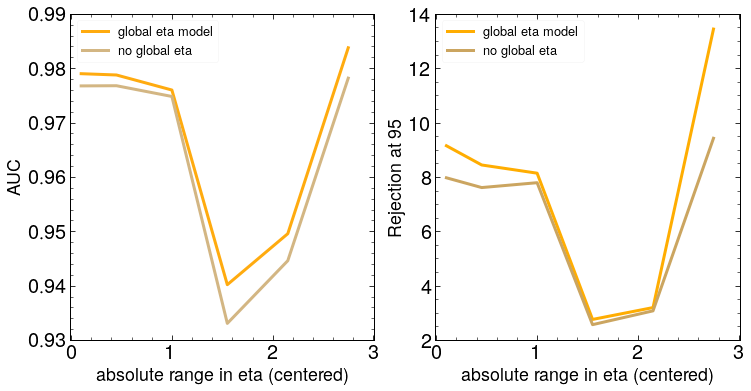

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(-.01, 3.01)
ax1.plot(eta_range2, aucs_g2[:-1], linewidth=3, c='xkcd:yellowish orange', label='global eta model')
ax1.plot(eta_range2, aucs_ng2[:-1], linewidth=3, c='xkcd:very light brown', label='no global eta')
ax1.set_xlabel('absolute range in eta (centered)')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.set_xlim(-.01, 3.01)
ax2.plot(eta_range2, reg95_g2[:-1], linewidth=3, c='xkcd:orange yellow', label='global eta model')
ax2.plot(eta_range2, reg95_ng2[:-1], linewidth=3, c='xkcd:sand brown', label='no global eta')
ax2.set_xlabel('absolute range in eta (centered)')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()